# Password strenght prediction project

Model to predict how safe a password is


In [211]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# the data is stored in a sqlite db 
import sqlite3

In [213]:
#stablish connection with the sql db
con = sqlite3.connect(r'D:/DS_PROJ/password_resources/password_data.sqlite')

In [214]:
#extract the data from the db into a dataframe
data = pd.read_sql_query('SELECT * FROM Users', con)

In [215]:
data.shape

(100000, 3)

In [216]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


# Data cleaning
evaluate missing, duplicated values, irrelevant values, data types

In [217]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [218]:
data.drop('index', axis = 1,inplace = True)

In [219]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [220]:
data.duplicated().sum()

0

In [221]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [222]:
data.dtypes

password    object
strength     int64
dtype: object

In [223]:
#evaluate the strength values to find irrelevant values (values that are not 1, 2 or 0)
data['strength'].unique()

array([1, 2, 0], dtype=int64)

# Data Analysis

Semantic Analysis of the password data

-How many password holds only numerical characters?

-How many password holds only Uppper case characters?

-How many password holds alpha-numerical characters?

-How many password holds title-case characters?

-How many password holds some special characters?

### -How many password holds only numerical characters?

In [224]:
data['password'].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [225]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [226]:
data[data['password'].str.isnumeric()].shape

(26, 2)

26 passwords have only numeric caracters 

### How many password holds only Uppper case characters?

In [227]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


1506 passwords have only upper case characters

### How many password holds only alpha-numeric case characters?

In [228]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [229]:
data[data['password'].str.isalnum()].shape

(97203, 2)

97% of the passwords are only alphanumeric

### How many password holds title-case characters?

In [230]:
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


### How many password holds some special characters?

In [231]:
# string package
import string

In [232]:
#special characters
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [233]:
#function to find special characters

def find_specials(row):
    for char in row :
        if char in string.punctuation:
            return 1
        else:
            pass

In [234]:
data['password'].apply(find_specials)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [235]:
data[data['password'].apply(find_specials)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [236]:
data[data['password'].apply(find_specials)==1].shape

(2663, 2)

26% of the passwords have special characters

# Feature engineering
We have to obtain useful features for the ML Algorithm from the features that we have

Which factors will impact the most in the strenght of the password? :
    
    - The length of the password
    - The frequency of lower case characters
    - The frequency of numeric characters
    - The frequency of uppercase characters
    - The frequency of special characters

In [237]:
#obtain length of password
data['length'] = data['password'].str.len()

In [238]:
#obtain the frequency of lower case characters in a password
def freq_low(row):
    return len([char for char in row if char.islower()])/len(row)

In [239]:
#obtain the frequency of upper case characters in a password
def freq_upper(row):
    return len([char for char in row if char.isupper()])/len(row)

In [240]:
#obtain the frequency of lower case characters in a password
def freq_num(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [241]:
#create the features 

data['lowercase_freq'] = np.round(data['password'].apply(freq_low),3)

data['uppercase_freq'] = np.round(data['password'].apply(freq_upper),3)

data['numeric_freq'] = np.round(data['password'].apply(freq_num),3)

In [242]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,numeric_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [243]:
#to obtain the frequency of special characters in a password, it's considered special if it's not a alphanumeric 
def freq_special(row) :
    return len([char for char in row if not (char.isalpha() or char.isdigit())])/len(row)

In [244]:
data['special_char_freq'] = np.round(data['password'].apply(freq_special),3)

In [245]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,numeric_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


# Data Analysis
Evaluate if the features are useful or not:

Perform Descriptive Statictis

In [246]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'numeric_freq', 'special_char_freq'],
      dtype='object')

In [247]:
#obtain statistics of the feature 
data[['length','strength']].groupby(['strength']).agg(['min','max','mean','median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947      7
1             8   13   9.611074      9
2            14  220  15.953421     16

In [248]:
cols = ['length', 'lowercase_freq', 'uppercase_freq','numeric_freq', 'special_char_freq']

In [249]:
#apply for all the features
for col in cols:
    print(col)
    print(data[[col,'strength']].groupby(['strength']).agg(['min','max','mean','median']))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947      7
1             8   13   9.611074      9
2            14  220  15.953421     16


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


numeric_freq
         numeric_freq                        
                  min    max      mean median
strength                                  

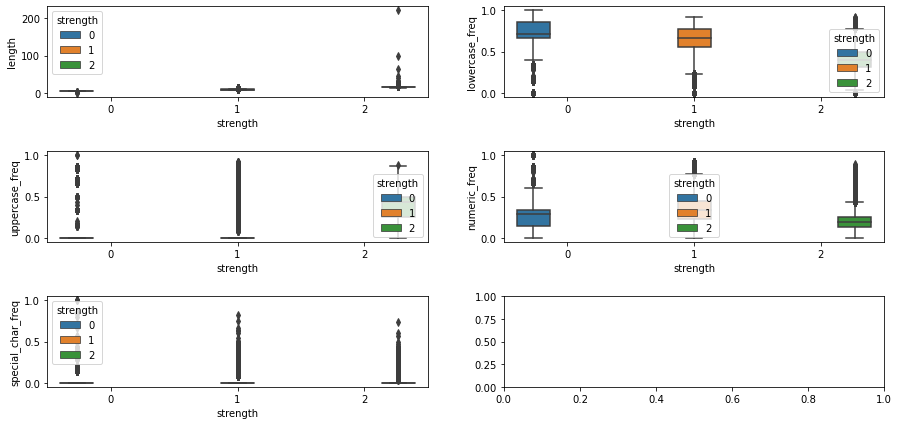

In [250]:
#analyze using boxlpot
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))  = plt.subplots(3,2,figsize = (15,7))
sns.boxplot(x='strength', y = 'length', hue = 'strength',ax = ax1 , data = data)
sns.boxplot(x='strength', y = 'lowercase_freq', hue = 'strength',ax = ax2 , data = data)
sns.boxplot(x='strength', y = 'uppercase_freq', hue = 'strength',ax = ax3 , data = data)
sns.boxplot(x='strength', y = 'numeric_freq', hue = 'strength',ax = ax4 , data = data)
sns.boxplot(x='strength', y = 'special_char_freq', hue = 'strength',ax = ax5 , data = data)

plt.subplots_adjust(hspace = 0.6)


# Feature importance
find which features are mmore relevant for the ML algorithm

In [251]:
import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

In [252]:
def get_dist(data,feature):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x = 'strength',y = feature, data= data)
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']== 0][feature], color = 'red',label = '0', hist = False)
    sns.distplot(data[data['strength']== 1][feature], color = 'blue',label = '1', hist = False)
    sns.distplot(data[data['strength']== 2][feature], color = 'orange',label = '2', hist = False)
    plt.legend()
    plt.show()
    

The relevance of each feature es dimensioned by the overlap of the density grapichs of the 3 strength values
when the graphic doesn't overlap it means that is relevant for the ML alg.

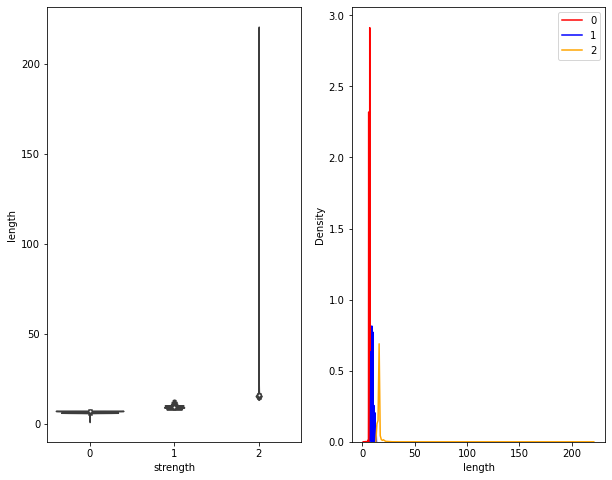

In [253]:
get_dist(data,'length')

analyzing both figures, they present few overlapping regions

for the class 2, the values of length are higher thann class 1 & 0

this means that the 'length' feature gives important information to determine the strength value

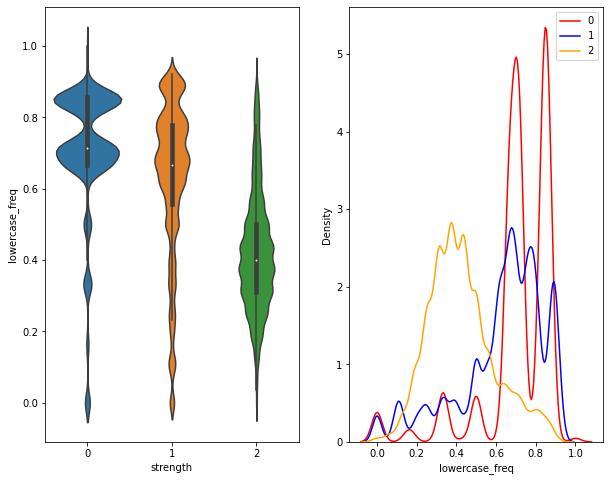

In [254]:
get_dist(data,'lowercase_freq')

Similarly, the figures present overlapping for class 0 & 1 but not for class 2

for the class 2, the values of lowercase_freq are lower than class 1 & 0

this means that the 'lowercase_freq' feature gives important information to determine the strength value too

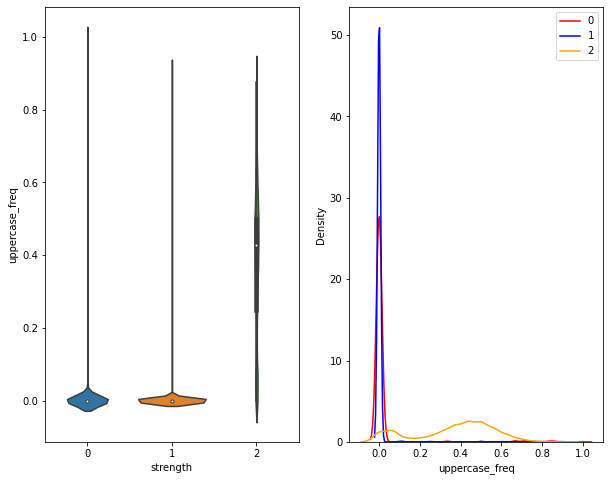

In [255]:
get_dist(data,'uppercase_freq')

In this case, the grapichs present high overlapping

Higher uppercase frequency is observed in stronger passwords (strength 2).

and lower frequency for weak passwords (strength 0)

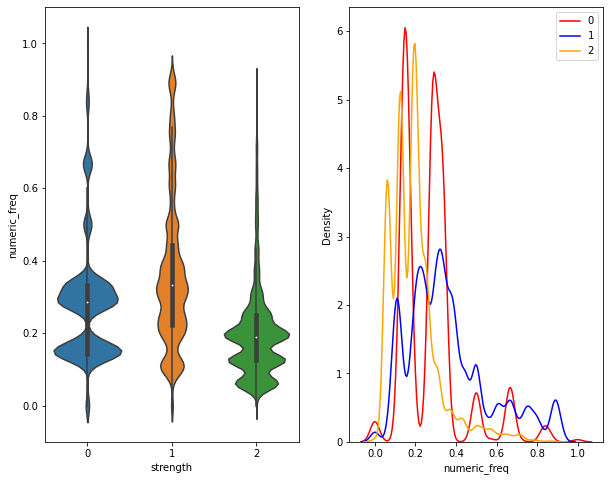

In [256]:
get_dist(data,'numeric_freq')

Weak passwords (strength 0) have higher frequency of digits.

Strong passwords (strength 2) tend to have less digit freq.

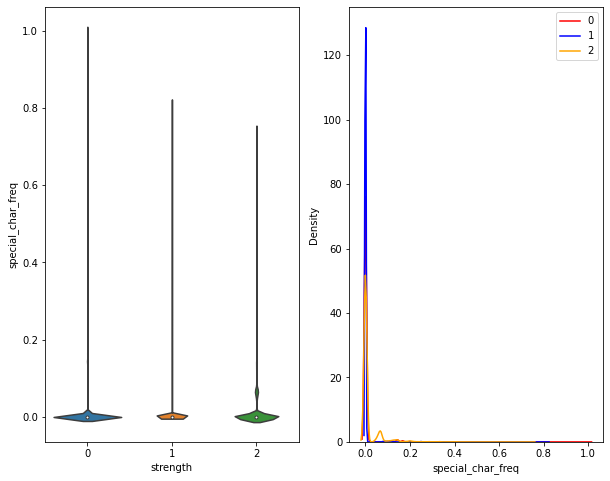

In [257]:
get_dist(data,'special_char_freq')

Special character frequency increases with strength.

Stronger passwords (strength 2) show more special characters

#### length & lowercase freq feature seems to be the most relevant features since they present less overlapping

# TF_IDF

Convert text into a vector representation

Each password is a serie of chars, we can represent the password as a vector
with the TF_IDF values of each char 

Thats why we have to split our password as 'kzde5577' : ['k', 'z', 'd', 'e', '5', '5', '7', '7']

Then we can compute the Tf-Idf value of each character like Tf-IDF value of k' , Tf-IDF value of 'z',  Tf-IDF value of 'd', etc

In [258]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,numeric_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043


In [259]:
#we shuffle the data to improve the robustness of the ML Alg
dataframe = data.sample(frac=1)

In [260]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,numeric_freq,special_char_freq
79199,r3mw3xa,0,7,0.714,0.0,0.286,0.000
41698,defins2010,1,10,0.600,0.0,0.400,0.000
11019,panidarapu123,1,13,0.769,0.0,0.231,0.000
43889,isyl3934656,1,11,0.364,0.0,0.636,0.000
93022,hi7333,0,6,0.333,0.0,0.667,0.000
...,...,...,...,...,...,...,...
92793,onur758081,1,10,0.400,0.0,0.600,0.000
35931,bamboo007,1,9,0.667,0.0,0.333,0.000
25485,vcahjoziu614,1,12,0.750,0.0,0.250,0.000
33959,porzanarak55,1,12,0.833,0.0,0.167,0.000


In [261]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [289]:
vectorizer = TfidfVectorizer(analyzer = 'char')

In [333]:
X = vectorizer.fit_transform(list(dataframe['password']))

In [334]:
X.shape

(100000, 99)

In [265]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [266]:
dataframe['password']

79199              r3mw3xa
41698           defins2010
11019        panidarapu123
43889          isyl3934656
93022               hi7333
               ...        
92793           onur758081
35931            bamboo007
25485         vcahjoziu614
33959         porzanarak55
17798    kumbangjantan@100
Name: password, Length: 100000, dtype: object

In [267]:
X.toarray()[0] #this is the vector representation of the first element of the dataframe ('leevi637e')

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.62516544, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.2323125 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.32105503,
       0.        , 0.        , 0.        , 0.        , 0.30945575,
       0.        , 0.        , 0.        , 0.        , 0.40274487,
       0.44063187, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [268]:
vectorizer.get_feature_names() #there are all the characters used in all the passwords

['\x04',
 '\x06',
 '\x08',
 '\x0e',
 '\x10',
 '\x11',
 '\x17',
 ' ',
 '!',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '¡',
 '¨',
 '°',
 '±',
 '³',
 '´',
 'µ',
 '·',
 'ß',
 'à',
 'á',
 'ä',
 'æ',
 'ç',
 'é',
 'ê',
 'í',
 'ñ',
 'ó',
 'õ',
 'ö',
 '÷',
 'ú',
 'ü',
 'ý',
 'þ',
 '›']

In [269]:
len(vectorizer.get_feature_names()) #the paswords use 99 unique characters

99

In [270]:
#we create a new data frame  with passwords as rows and each char as column, 
#this data frame is the vectorial representation of each password using tf-idf
df2 = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

In [271]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Machine Learning Algorithm

In [272]:
#in previous cells we defined that the most relevant features for the strength prediction are length and lowercase_freq
#so we include those features in the new data frame

df2['length'] = dataframe['length']
df2['lowercase_freq'] = dataframe['lowercase_freq']

In [273]:
#now we have a new df with the most relevant features (length and lowercase freq) 
#and the values obtained from the tf-idf transformation
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [274]:
from sklearn.model_selection import train_test_split

In [275]:
#dependant variable
y = dataframe['strength']

In [276]:
#split the data into 
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size = 0.20)

Since this is a classification problem (classify the password by the strength (0,1 or 2)) we are going to use the logistic regression algorithm

In [277]:
from sklearn.linear_model import LogisticRegression

In [278]:
#we have more than 2 classes
clf = LogisticRegression(multi_class='multinomial')

In [279]:
#train the model
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [280]:
#test the model
y_pred= clf.predict(X_test)

In [281]:
y_pred

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

### Predicting on sample data

Now we have to apply the model on a given password:

We need to transform a password e.g. 'aserW435!' into an input my ML alg can wor with

Let's remember that each password has been transformed into a (1,101) vector, 99 char tf-idf values and 2 extra features(length and lower_freq)

so we have to apply te same transformation to the entered value

In [326]:
password = "%@123abcd"

In [339]:
sample_array = np.array([password])

In [340]:
sample_matrix = vectorizer.transform(sample_array)

In [341]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [342]:
sample_matrix.shape


(1, 99)

In [344]:
#obtaining the 2 extra features length and lower case freq
len(password)

9

In [345]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [350]:
#add those values into the matrix, the result must have (1,101) shape
new_matrix = np.append(sample_matrix.toarray(),(9, 0.444)).reshape(1,101)

In [351]:
clf.predict(new_matrix)

array([0], dtype=int64)

Let's create a function that does the previous process

In [356]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    length = len(password)
    low_freq = len([char for char in password if char.islower()])/len(password)
    new_matrix2 = np.append(sample_matrix.toarray(),(length, low_freq)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0:
        return 'Password is weak'
    elif result ==1:
        return 'Password is normal'
    else:
        return 'Password is strong'
        

In [357]:
predict()

Enter a password : w34241FF


'Password is normal'

## Evaluate the model

Evluate how well the Algoritm performs

In [360]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [361]:
accuracy_score(y_test, y_pred)

0.7978

<AxesSubplot:>

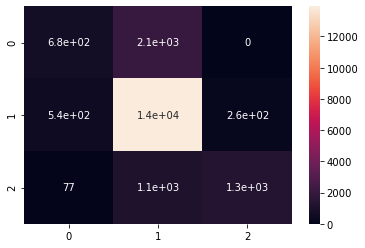

In [367]:
#heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True )

In [368]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.25      0.34      2745
           1       0.81      0.95      0.88     14724
           2       0.84      0.53      0.65      2531

    accuracy                           0.80     20000
   macro avg       0.73      0.58      0.62     20000
weighted avg       0.78      0.80      0.77     20000

